In [ ]:
class Person:
    name = 'Adam'
    
p = Person()

# setting attribute name to John
setattr(p, 'name', 'John')
print('Name is:', p.name)

# setting an attribute not present in Person
setattr(p, 'age', 23)
print('Age is:', p.age)

In [4]:
from symfit import variables, Parameter, ODEModel, Fit, D 
import numpy as np
import pandas as pd

xdata = df['Area'].astype(float)
tdata = df['Time (hr)'].astype(float)
# sdata = df['malic_acid']
# pdata = df['succinic_acid']


Cx, t = variables('Cx,  t')
kd = Parameter('kd', 0.1)
# alpha = Parameter('alpha', 0.1)
# beta = Parameter('beta', 0.1)
# kdp = Parameter('kdp, 0.1')


model_dict = {
    D(Cx, t): 1*Cx - kd*Cx,}
    # D(Cs, t): -0.7*Cx/0.5 + mu*Cx/0.5 + 0.7, 
    # D(Cp, t): alpha*0.7*Cx + beta*Cx - 0.6 * Cp,

ode_model = ODEModel(model_dict, initial={ Cx: 0.0,  t: 6.0})
fit = Fit(ode_model,  Cx=xdata, t= tdata)




NameError: name 'df' is not defined

In [5]:
df = pd.read_csv('/Users/olayile/Bioprocess-tool/PhD results 37deg A.succinogen 21_12_2020-24_12_2020 - Complete.csv')


In [6]:
df = df[df['Solid Loading']==5]
df

,ID,Time (hr),Solid Loading,Area,succinic_acid,lactic_acid,formic_acid,acetic_acid,malic_acid,citric_acid
0,zn_5_0,0,5,0,0.000000,0.000,0.000,0.000,0.000000,NaN
1,zn_5_6,6,5,1085946,3.335815,0.246,0.270,1.173,0.407120,NaN
2,zn_5_12,12,5,855741,2.602678,0.237,0.279,1.172,0.429311,NaN
3,zn_5_18,18,5,2476429,7.764105,NaN,0.271,1.170,0.406348,NaN
4,zn_5_24,24,5,2586266,8.113904,NaN,0.269,1.153,0.408973,NaN
5,zn_5_36,36,5,2751715,8.640812,NaN,0.299,1.192,0.424266,NaN
6,zn_5_42,42,5,2789671,8.761691,NaN,0.297,1.183,0.412398,NaN
7,zn_5_48,48,5,2808018,8.820121,NaN,0.306,1.195,0.417058,NaN
8,zn_5_60,60,5,2751526,8.640210,NaN,0.288,1.161,0.411270,NaN
9,zn_5_66,66,5,2783258,8.741268,NaN,0.295,1.175,0.412315,NaN


[-0.11400142]
Mean Squared Error:  0.011772120951836511
R^2 : 0.902478914237213


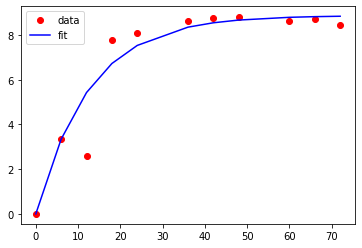

In [114]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint

# given data we want to fit
xdata = df['succinic_acid'].astype(float)
tdata = df['Time (hr)'].astype(float)

def ds_dt(Cx, t, mu):
        rs= mu*Cx/0.6 + 0.1*Cx/0.9 + 0.7
        return rs

def fitfunc(t, mu):
    'Function that returns Ca computed from an ODE for a k'

    Ca0 = 0
    Casol = odeint(ds_dt, Ca0, t, args=mu)
    return Casol[:,0]

k_fit, kcov = curve_fit(fitfunc, tdata, xdata, p0=1)
print(k_fit)

tfit = tdata;
fit = fitfunc(tfit, k_fit)

import matplotlib.pyplot as plt
plt.plot(tdata, xdata, 'ro', label='data')
plt.plot(tfit, fit, 'b-', label='fit')
plt.legend(loc='best')
plt.savefig('images/ode-fit.png')


print("Mean Squared Error: ", (np.mean(xdata-fit)**2))

ss_res = np.dot((xdata - fit),(xdata - fit))
ymean = np.mean(xdata)
ss_tot = np.dot((xdata-ymean),(xdata-ymean))
print("R^2 :",  1-ss_res/ss_tot)

- Another way to integrate but get multiple parameters

Testing from (Stack o/f)[https://stackoverflow.com/questions/61011675/curve-fit-parameters-in-multiple-ode-function]

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from lmfit import Model


def ds_dt(Cx, t):
        rs= mu*Cx/0.6 + 0.1*Cx/0.9 + 0.7
        return rs

def fitfunc(t, mu,  Ca0):
    'Function that returns Ca computed from an ODE for a k'

    
     
    return odeint(ds_dt, Ca0, t, args=(mu,))

# given data we want to fit
xdata = df['succinic_acid'].astype(float)
tdata = df['Time (hr)'].astype(float)
Ca0 = 0

omodel = Model(fitfunc, independent_vars=('t', 'Ca0'))


params = omodel.make_params(mu=0.5)


result = omodel.fit(xdata, params, t=tdata, Ca0= Ca0)


print(result.fit_report(min_correl=0.5))



TypeError: ds_dt() takes 2 positional arguments but 3 were given

Ethanol couple 3 ODEs om [stack o/f](https://stackoverflow.com/questions/28990936/curve-fitting-to-three-coupled-odes)

# Fit using leastsq:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 65
    # data points      = 101
    # variables        = 4
    chi-square         = 21.7961792
    reduced chi-square = 0.22470288
    Akaike info crit   = -146.871969
    Bayesian info crit = -136.411487
[[Variables]]
    offset:  0.96333090 +/- 0.04735921 (4.92%) (init = 2)
    omega:   3.98700821 +/- 0.02079710 (0.52%) (init = 3.3)
    amp:     1.80253577 +/- 0.19401989 (10.76%) (init = 2.5)
    decay:   5.76279825 +/- 1.04073303 (18.06%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, decay) = -0.755


# Fit using differential_evolution:
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 1425
    # data points      = 101
    # variables        = 4
    chi-square         = 21.7961792
    reduced chi-square = 0.22470288
    Akaike info crit   = -146.871969
    Bayesian info crit = -136.411487
[[Variables]]
    offset: 

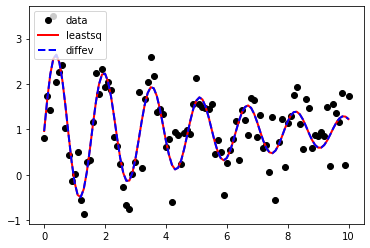

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import lmfit

np.random.seed(2)
x = np.linspace(0, 10, 101)

# Setup example
decay = 5
offset = 1.0
amp = 2.0
omega = 4.0

y = offset + amp*np.sin(omega*x) * np.exp(-x/decay)
yn = y + np.random.normal(size=y.size, scale=0.450)


def resid(params, x, ydata):
    decay = params['decay'].value
    offset = params['offset']
    omega = params['omega'].value
    amp = params['amp'].value

    y_model = offset + amp * np.sin(x*omega) * np.exp(-x/decay)
    return y_model - ydata


params = lmfit.Parameters()
params.add('offset', 2.0, min=0, max=10.0)
params.add('omega', 3.3, min=0, max=10.0)
params.add('amp', 2.5, min=0, max=10.0)
params.add('decay', 1.0, min=0, max=10.0)

o1 = lmfit.minimize(resid, params, args=(x, yn), method='leastsq')
print("# Fit using leastsq:")
lmfit.report_fit(o1)

o2 = lmfit.minimize(resid, params, args=(x, yn), method='differential_evolution')
print("\n\n# Fit using differential_evolution:")
lmfit.report_fit(o2)

plt.plot(x, yn, 'ko', lw=2)
plt.plot(x, yn+o1.residual, 'r-', lw=2)
plt.plot(x, yn+o2.residual, 'b--', lw=2)
plt.legend(['data', 'leastsq', 'diffev'], loc='upper left')
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import lmfit

# given data we want to fit
xdata = df['succinic_acid'].astype(float)
tdata = df['Time (hr)'].astype(float)

def ds_dt(Cx, t, mu):
        rs= mu*Cx/0.1 + 0.1*Cx/0.1 + 0.1
        return rs

def fitfunc(t, Cx0, mu):
    'Function that returns Ca computed from an ODE for a k'
    Casol = odeint(ds_dt, Cx0, t, args=(mu,))
    return Casol[:,0]

def residual(params, t, data):
    mu = params['mu'].value
    Cx0 = 0
    model = fitfunc(t, Cx0, mu)
    return model-data


params = lmfit.Parameters()

params.add('mu', value=0.2, min=0, max=10)

o1 = lmfit.minimize(residual, params, args=(tdata, xdata), method='leastsq', nan_policy='omit')


print("# Fit using leastsq:")
lmfit.report_fit(o1)


#ADDED NAN POLICY BECAUSE A COMPUTED VALUE MAY BE NEGATIVE
o2 = lmfit.minimize(residual, params, args=(tdata, xdata), method='differential_evolution', nan_policy='omit')
print("\n\n# Fit using differential_evolution:")
lmfit.report_fit(o2)




# Fit using leastsq:
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 306
    # data points      = 11
    # variables        = 1
    chi-square         = 3.4547e+60
    reduced chi-square = 3.4547e+59
    Akaike info crit   = 1508.96639
    Bayesian info crit = 1509.36428
[[Variables]]
    mu:  1.1102e-15 +/- 0.00117418 (105760874489867.27%) (init = 0.2)


# Fit using differential_evolution:
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 2001
    # data points      = 8
    # variables        = 1
    chi-square         = inf
    reduced chi-square = inf
    Akaike info crit   = inf
    Bayesian info crit = inf
##  Warning: uncertainties could not be estimated:
[[Variables]]
    mu:  6.43169584 (init = 0.2)
odict_items([('mu', <Parameter 'mu', value=1.1102230246251565e-15 +/- 0.00117, bounds=[0:10]>)])


In [30]:
param_dict= []

for name, param in o1.params.items():
    param_dict.append([name, param.value, param.stderr, param.init_value, param.correl, param.expr, param.max, param.min, param.vary])


In [31]:
param_dict

[['mu',
  1.1102230246251565e-15,
  0.00117418157963142,
  0.2,
  {},
  None,
  10,
  0,
  True]]

In [36]:
o1.chisqr
o1.residual
o1.var_names
o1.covar

array([[1.37870238e-06]])

# NOTES


- The ploblem is from my equation, do the right equations and calculations 
- why are the mus of lmfit and de fit completely different?

- add in correct yields
- user can choose proper method 
- can now use numerous parameters

- used ODE in addition to urve fitting
- input starting PARAMETERS

cHECK LMFIT DOCUMENTATION FOR OTHER PARAMETERS TO CHANGE 

[lmfit](https://lmfit.github.io/lmfit-py/fitting.html)

[SCIPY DOCUMENTATION ON DE FOR PARAMETERS TO CHANGE](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.differential_evolution.html)

